<a href="https://colab.research.google.com/github/Pizzawookiee/interference_experiment/blob/master/Lee_David_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#modules for loading/visualizing data
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#modules for processing data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import label_binarize

#sklearn modules for machine learning
from sklearn.neighbors import KNeighborsClassifier

#modules to help with interpreting results
from sklearn import metrics

In [ ]:
#loading data
data = pd.read_csv ('https://raw.githubusercontent.com/Pizzawookiee/interference_experiment/master/experiment_data.csv', index_col=0)
safe_or_not = []

#adding binary classifier info (0 means line of sight distance was <= 6 feet, 1 means line of sight distance was > 6 feet)
for i in data['distance']:
  if i <= 6:
    safe_or_not.append(0)
  else:
    safe_or_not.append(1)
data['safe_or_not'] = safe_or_not

data.head()

,time_of_experiment,scanner_status,advertiser_status,RSSI,distance,safe_or_not
0,2020-07-17 19:31:01.422788,3,3,-70,8,1
0,2020-07-17 19:31:03.427803,3,3,-74,8,1
0,2020-07-17 19:31:05.432687,3,3,-72,8,1
0,2020-07-17 19:31:07.437753,3,3,-77,8,1
0,2020-07-17 19:31:09.442695,3,3,-71,8,1


In [ ]:
#splitting data into train, val and test sets

test_size = 0.2

y = data['distance']
y_binary = data['safe_or_not']

train_scaler = StandardScaler()

#splitting data for test 1 (knowledge of advertiser and scanner status)

X_train, X_test, y_train, y_test = train_test_split(data[['advertiser_status','scanner_status','RSSI']], y,
                                                    test_size=test_size, stratify = y, random_state = 25)

for i in X_train.columns.tolist():
  feature_data = X_train[i].values.reshape(-1,1)
  train_scaler.fit(feature_data)
  X_train[i] = train_scaler.transform(feature_data)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=test_size, stratify = y_train, random_state = 25)

#splitting data for test 2 (only knowledge of scanner status)

X_train2, X_test2, y_train2, y_test2 = train_test_split(data[['scanner_status', 'RSSI']], y, test_size=test_size, stratify = y, random_state = 25)

for i in X_train2.columns.tolist():
  feature_data = X_train2[i].values.reshape(-1,1)
  train_scaler.fit(feature_data)
  X_train2[i] = train_scaler.transform(feature_data)

X_train2, X_val2, y_train2, y_val2 = train_test_split(X_train2, y_train2, test_size=test_size, stratify = y_train2, random_state = 25)

#splitting data for test 3 (no knowledge of either advertiser or scanner status)

X_train3, X_test3, y_train3, y_test3 = train_test_split(data[['RSSI']], y, test_size=test_size, stratify = y, random_state = 25)

for i in X_train3.columns.tolist():
  feature_data = X_train3[i].values.reshape(-1,1)
  train_scaler.fit(feature_data)
  X_train3[i] = train_scaler.transform(feature_data)

X_train3, X_val3, y_train3, y_val3 = train_test_split(X_train3, y_train3, test_size=test_size, stratify = y_train3, random_state = 25)

#splitting data for test 4 (knowledge of advertiser and scanner status) (binary: is distance <= or > 6 feet?)

X_train4, X_test4, y_train4, y_test4 = train_test_split(data[['advertiser_status','scanner_status','RSSI']], y_binary,
                                                        test_size=test_size, stratify = y_binary, random_state = 25)

for i in X_train4.columns.tolist():
  feature_data = X_train4[i].values.reshape(-1,1)
  train_scaler.fit(feature_data)
  X_train4[i] = train_scaler.transform(feature_data)

X_train4, X_val4, y_train4, y_val4 = train_test_split(X_train4, y_train4, test_size=test_size, stratify = y_train4, random_state = 25)

#splitting data for test 5 (only knowledge of scanner status) (binary: is distance <= or > 6 feet?)

X_train5, X_test5, y_train5, y_test5 = train_test_split(data[['scanner_status', 'RSSI']], y_binary, test_size=test_size, stratify = y_binary, random_state = 25)

for i in X_train5.columns.tolist():
  feature_data = X_train5[i].values.reshape(-1,1)
  train_scaler.fit(feature_data)
  X_train5[i] = train_scaler.transform(feature_data)

X_train5, X_val5, y_train5, y_val5 = train_test_split(X_train5, y_train5, test_size=test_size, stratify = y_train5, random_state = 25)

#splitting data for test 3 (no knowledge of either advertiser or scanner status) (binary: is distance <= or > 6 feet?)

X_train6, X_test6, y_train6, y_test6 = train_test_split(data[['RSSI']], y_binary, test_size=test_size, stratify = y_binary, random_state = 25)

for i in X_train6.columns.tolist():
  feature_data = X_train6[i].values.reshape(-1,1)
  train_scaler.fit(feature_data)
  X_train6[i] = train_scaler.transform(feature_data)

X_train6, X_val6, y_train6, y_val6 = train_test_split(X_train6, y_train6, test_size=test_size, stratify = y_train6, random_state = 25)

In [ ]:
#initializing the knn model to be used

def knn (X_train, y_train, X_val, predict_or_proba = 'predict'):
  model = KNeighborsClassifier(n_neighbors=30, weights='distance').fit(X_train, y_train)
  knn_pred = model.predict(X_val)
  knn_proba = model.predict_proba(X_val)
  if predict_or_proba == 'predict':
    return knn_pred
  elif predict_or_proba == 'proba':
    return knn_proba
  else:
    raise TypeError ('input either *predict* or *proba*')

#fit to model, produce accuracy results

def knn_accuracies_and_confusion_matrix (X_train, y_train, X_val, y_val, binary=False):
  val_pred = knn (X_train, y_train, X_val)
  train_pred = knn (X_train, y_train, X_train)
  print ("Training accuracy is " + str(metrics.accuracy_score(y_train, train_pred)))
  print ("Validation accuracy is " + str(metrics.accuracy_score (y_val, val_pred)))
  
  conf_mat = metrics.confusion_matrix(y_val, val_pred)
  actually_lower = np.sum(np.triu(conf_mat, 1))
  total = np.sum(conf_mat)
  if binary:
    print ('False positive rate is ' + str(conf_mat[0,1]/np.sum(conf_mat[:,1])))
  else:
    print ('Probability that predicted distance is higher than true distance is ' + str(np.mean(actually_lower/total)) + '\n')

  print (pd.crosstab (y_val, val_pred, rownames=['True'], colnames = ['Predicted'], margins=True))

def test_accuracy (X_train, y_train, X_test, y_test):
  test_pred = knn(X_train, y_train, X_test)
  print('\nTesting accuracy is ' + str(metrics.accuracy_score(y_test, test_pred))) 

The next six cells calculate training and validation accuracies for corresponding tests (of which their description is in the earlier cell for splitting data). For multiclass (distance classifiers), the probability that predicted distance was higher than the true distance is included. For binary (safe or not classifier), the false positive rate (line of sight distance predicted to be safe, or over 6 feet, when actual distance <= 6 feet) is included.

In [ ]:
knn_accuracies_and_confusion_matrix (X_train, y_train, X_val, y_val)
test_accuracy (X_train, y_train, X_test, y_test)

Training accuracy is 0.5781688344809998
Validation accuracy is 0.5632330443651198
Probability that predicted distance is higher than true distance is 0.2409484956654768

Predicted    2    4    6    8   10   All
True                                    
2          521   72   85   52   59   789
4          114  391  104   64  101   774
6           90  112  310  131  140   783
8           35   65   72  478  137   787
10          24   95   58  103  509   789
All        784  735  629  828  946  3922

Testing accuracy is 0.200734394124847


In [ ]:
knn_accuracies_and_confusion_matrix (X_train2, y_train2, X_val2, y_val2)
test_accuracy (X_train2, y_train2, X_test2, y_test2)

Training accuracy is 0.40965314970670746
Validation accuracy is 0.39036206017338093
Probability that predicted distance is higher than true distance is 0.33579806221315656

Predicted    2    4    6    8    10   All
True                                     
2          466  118   55   71    79   789
4          181  277   83  118   115   774
6          114  139  152  160   218   783
8           71   79  111  226   300   787
10          43   84  100  152   410   789
All        875  697  501  727  1122  3922

Testing accuracy is 0.200734394124847


In [ ]:
knn_accuracies_and_confusion_matrix (X_train3, y_train3, X_val3, y_val3)
test_accuracy(X_train3, y_train3, X_test3, y_test3)

Training accuracy is 0.34959194083142053
Validation accuracy is 0.35033146353901073
Probability that predicted distance is higher than true distance is 0.32916879143294236

Predicted    2    4    6    8    10   All
True                                     
2          442  176   66   11    94   789
4          158  299  113   47   157   774
6           91  202  180   55   255   783
8           42  135  197   96   317   787
10          39  113  169  111   357   789
All        772  925  725  320  1180  3922

Testing accuracy is 0.200734394124847


In [ ]:
knn_accuracies_and_confusion_matrix (X_train4, y_train4, X_val4, y_val4, binary=True)
test_accuracy(X_train4,y_train4,X_test4,y_test4)

Training accuracy is 0.7848763070645244
Validation accuracy is 0.7735849056603774
False positive rate is 0.2718832891246684
Predicted     0     1   All
True                       
0          1936   410  2346
1           478  1098  1576
All        2414  1508  3922
Testing accuracy is 0.4018767849857201


In [ ]:
knn_accuracies_and_confusion_matrix (X_train5, y_train5, X_val5, y_val5, binary=True)
test_accuracy(X_train5,y_train5,X_test5,y_test5)

Training accuracy is 0.7011604182606478
Validation accuracy is 0.7027027027027027
False positive rate is 0.3660130718954248
Predicted     0     1   All
True                       
0          1786   560  2346
1           606   970  1576
All        2392  1530  3922
Testing accuracy is 0.4018767849857201


In [ ]:
knn_accuracies_and_confusion_matrix (X_train6, y_train6, X_val6, y_val6, binary=True)
test_accuracy(X_train6, y_train6, X_test6, y_test6)

Training accuracy is 0.6583142055598061
Validation accuracy is 0.672870984191739
False positive rate is 0.422772799156563
Predicted     0     1   All
True                       
0          1544   802  2346
1           481  1095  1576
All        2025  1897  3922
Testing accuracy is 0.4018767849857201


The next cells plot the Receiver Operating Characteristic curve and calculate the area under said curve for each test.

In [30]:
def roc_auc_and_auroc_score (X_train, y_train, X_val, y_val, roc_type='multiclass'):
  roc_pred = pd.DataFrame(knn(X_train, y_train, X_val, predict_or_proba='proba'))
  #roc_labels = [np.where(label==1)[0] for label in y_val]
  roc_labels = pd.DataFrame(y_val)
  plt.figure(figsize=(8,6))

  if roc_type == 'multiclass':
    fpr = {}
    tpr = {}
    roc_auc = {}
    
    for i in range (5):
      fpr[i], tpr[i], _ = metrics.roc_curve(roc_labels, roc_pred.iloc[:,i], pos_label=2*(i+1))
      roc_auc[i] = metrics.auc(fpr[i], tpr[i])
      plt.plot(fpr[i], tpr[i], label = str(2 * (i+1)) + ' feet')

    plt.plot([0,1], [0,1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Multi-Class ROC Curve')
    plt.legend()
    plt.show()

    print ('average area under the ROC curve is ' + str(np.mean([roc_auc[i] for i in range(5)])))
  
  elif roc_type == 'binary':
    fpr, tpr, _ = metrics.roc_curve(roc_labels, roc_pred.iloc[:,1])
    roc_auc = metrics.auc(fpr, tpr)
    plt.plot(fpr, tpr)

    plt.plot([0,1], [0,1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Binary ROC Curve')
    plt.show()

    print ('area under the ROC curve is ' + str(roc_auc))






 ROC analysis for distance branch (knowledge of both advertiser and scanner environment)


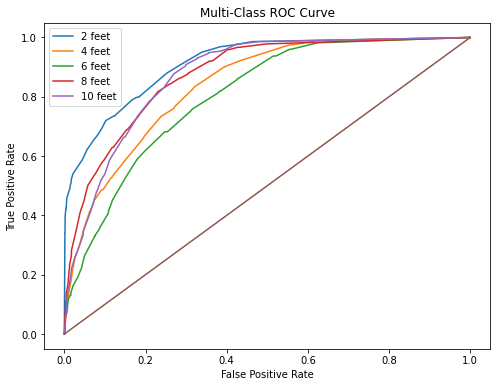

average area under the ROC curve is 0.8610168445026263

 ROC analysis for distance branch (knowledge of only scanner environment)


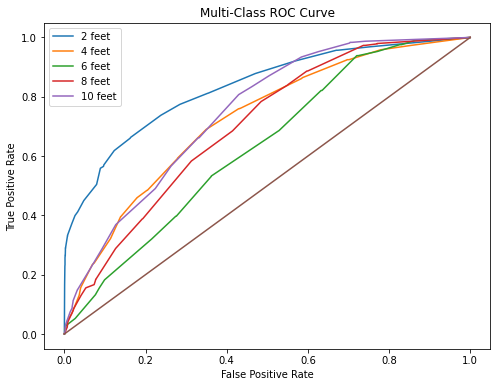

average area under the ROC curve is 0.726375456289412

 ROC analysis for distance branch subset 3 (no knowledge of scanner and advertiser environment)


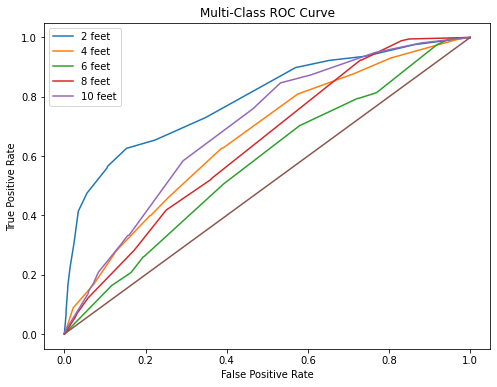

average area under the ROC curve is 0.6727623248668536

 ROC analysis for too close/safe distance branch (knowledge of both advertiser and scanner status)


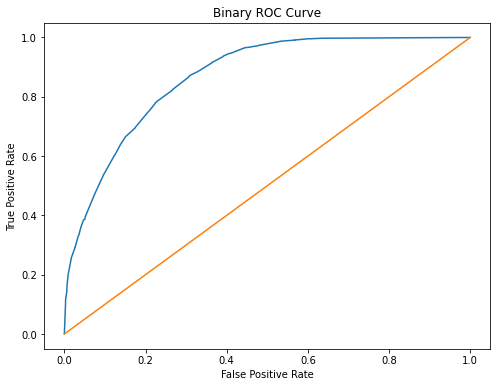

area under the ROC curve is 0.8677292810746016

 ROC analysis for too close/safe distance branch (knowledge of only scanner status)


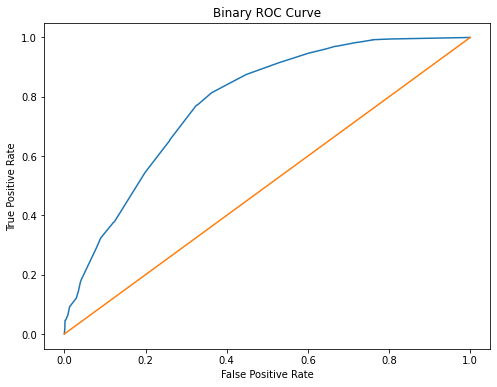

area under the ROC curve is 0.7811768384246216

 ROC analysis for too close/safe distance branch (no knowledge of scanner and advertiser status)


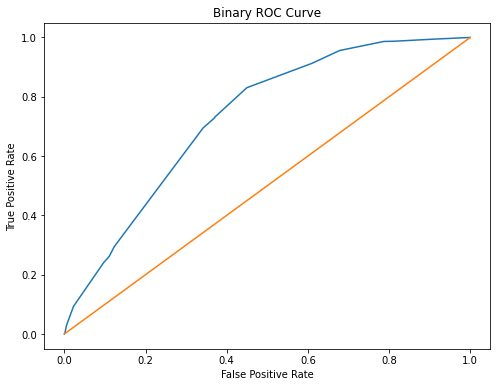

area under the ROC curve is 0.7315776178050122


In [31]:
print('\n ROC analysis for distance branch (knowledge of both advertiser and scanner environment)')
roc_auc_and_auroc_score (X_train, y_train, X_val, y_val)
print('\n ROC analysis for distance branch (knowledge of only scanner environment)')
roc_auc_and_auroc_score (X_train2, y_train2, X_val2, y_val2)
print('\n ROC analysis for distance branch subset 3 (no knowledge of scanner and advertiser environment)')
roc_auc_and_auroc_score (X_train3, y_train3, X_val3, y_val3)
print('\n ROC analysis for too close/safe distance branch (knowledge of both advertiser and scanner status)')
roc_auc_and_auroc_score (X_train4, y_train4, X_val4, y_val4, roc_type='binary')
print('\n ROC analysis for too close/safe distance branch (knowledge of only scanner status)')
roc_auc_and_auroc_score (X_train5, y_train5, X_val5, y_val5, roc_type='binary')
print('\n ROC analysis for too close/safe distance branch (no knowledge of scanner and advertiser status)')
roc_auc_and_auroc_score (X_train6, y_train6, X_val6, y_val6, roc_type='binary')